**DATA PREPARATION**

**Convert Whatsapp Chat Text file to xls**  
This converts original Whatsapp Chat .txt file to .xlsx extension
 
*Libraries Used:*  
Pandas, Datetime

In [98]:
import pandas as pd
from datetime import datetime

# Read your WhatsApp chat text file and store the contents in a variable
with open('UNIPORT U91-2406-1212_23.txt', 'r', encoding='utf-8') as file:
    whatsapp_text = file.readlines()

# Define lists to store data
users = []
messages = []
dates = []
times = []

# Loop through each line in the WhatsApp chat
for line in whatsapp_text:
    split_line = line.split('-', 1)
    
    if len(split_line) > 1:
        datetime_str, user_message = split_line
        
        try:
            datetime_obj = datetime.strptime(datetime_str.strip(), '%d/%m/%Y, %H:%M')
            
            user, message = user_message.split(':', 1)
            
            users.append(user.strip())
            messages.append(message.strip())
            dates.append(datetime_obj.strftime('%d-%m-%Y'))
            times.append(datetime_obj.strftime('%I:%M %p'))
        except ValueError:
            continue

whatsapp_df = pd.DataFrame({
    'User': users,
    'Message': messages,
    'Date': dates,
    'Time': times
})

whatsapp_df.to_excel('whatsapp_chat_converted.xlsx', index=False)

**Data Protection: Obscuring original chat group members' names (Data Governance)**   
This code reads WhatsApp chat data from an Excel file, generates coded names based on a specific pattern, creates a mapping list between real and coded names, and saves the masked data as well as the mapping list into new Excel files.

*Libraries Used:*   
Pandas

In [160]:
# Load the WhatsApp chat data from the provided xlsx file
file_path = 'whatsapp_chat_converted.xlsx'
whatsapp_df = pd.read_excel(file_path)

# Generating coded names with a specific pattern
whatsapp_df['Coded_Name'] = whatsapp_df.groupby('User').ngroup().add(1).apply(lambda x: f"User{x:03d}")

# Creating a mapping list for coded names and real names
mapping_list = dict(zip(whatsapp_df['User'], whatsapp_df['Coded_Name']))

# Replace 'User' column data with 'Coded_Name' column data
whatsapp_df['User'] = whatsapp_df['Coded_Name']

# Keep only the desired columns
whatsapp_df = whatsapp_df[['User', 'Message', 'Date', 'Time']]

# Save the modified DataFrame as an Excel file
masked_file_path = 'masked_whatsapp_chat2.xlsx'
whatsapp_df.to_excel(masked_file_path, index=False)

# Display the modified DataFrame
print(whatsapp_df.head())

      User                                    Message        Date      Time
0  User126                            <Media omitted>  17-04-2023  06:33 AM
1  User136  NSPPD is on Mixlr https://mixlr.com/nsppd  17-04-2023  07:51 AM
2  User146                            <Media omitted>  17-04-2023  08:07 AM
3  User146                            <Media omitted>  17-04-2023  08:09 AM
4  User146                            <Media omitted>  17-04-2023  08:29 AM


**Importing required libraries**  
These allow for the use Pandas for data manipulation, Matplotlib for data visualization, and Streamlit for creating web applications directly in Python scripts.

In [2]:
import matplotlib.pyplot as plt
import streamlit as st
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


True

**Data Analysis: Project Development Steps:**    

Generating Time Periods from DateTime
  
*Libraries Used:*  
Pandas

In [161]:
# Extract hour from the Time column in the whatsapp_df DataFrame
whatsapp_df['hour'] = pd.to_datetime(whatsapp_df['Time'], format='%I:%M %p').dt.hour

# Create the 'period' column
period = []
for hour in whatsapp_df['hour']:
    if hour == 23:
        period.append(str(hour) + "-" + str('00'))
    elif hour == 0:
        period.append(str('00') + "-" + str(hour + 1))
    else:
        period.append(str(hour) + "-" + str(hour + 1))

whatsapp_df['period'] = period
whatsapp_df.head()


,User,Message,Date,Time,hour,period
0,User126,<Media omitted>,17-04-2023,06:33 AM,6,6-7
1,User136,NSPPD is on Mixlr https://mixlr.com/nsppd,17-04-2023,07:51 AM,7,7-8
2,User146,<Media omitted>,17-04-2023,08:07 AM,8,8-9
3,User146,<Media omitted>,17-04-2023,08:09 AM,8,8-9
4,User146,<Media omitted>,17-04-2023,08:29 AM,8,8-9


**Display of Basic Statistics for Data Analysis**

**Total number of messages for the period**  

*Libraries Used:*  
Pandas: Data manipulation.  
Numpy: Array operations.

In [113]:
#Total Messages
df.shape[0]

5521

**Total number of words**

*Libraries Used:*  
Pandas,Python Standard Library (String manipulation).

In [114]:
# Total Number of words
words = []
for content in df['Message']:  # Replace 'Message' with your actual column name
    words.extend(str(content).split())

print(len(words))

41628


**Number of media messages**  

Using code to fill any NaN values in the 'Message' column with an empty string and then count the occurrences of "Media omitted" which generated null value using 'value_counts()' method combined with filtering.  

*Libraries Used:*  
Pandas, Python Standard Library (String search)

In [16]:
media_count = df[df['Message'].fillna('').str.contains('<Media omitted>')].shape[0]
print(media_count)

2026


**Total Number of Links Shared:**  *(install'!pip install urlextract')*

Utilizing the urlextract library to extract URLs from the 'Message' column in the DataFrame and calculating their total count.  

*Libraries Used:*  
Pandas, urlextract

In [15]:
from urlextract import URLExtract
import pandas as pd

# Assuming 'df' is your DataFrame with a 'message' column
extract = URLExtract()

links = []
for message in df['Message']:
    links.extend(extract.find_urls(str(message)))

print(len(links))

123


**Engagement by Top 10 Users:**  

Utilizing Matplotlib to create a bar plot displaying the message count for the top 10 users in the DataFrame.

*Libraries Used:*   
Pandas, Matplotlib

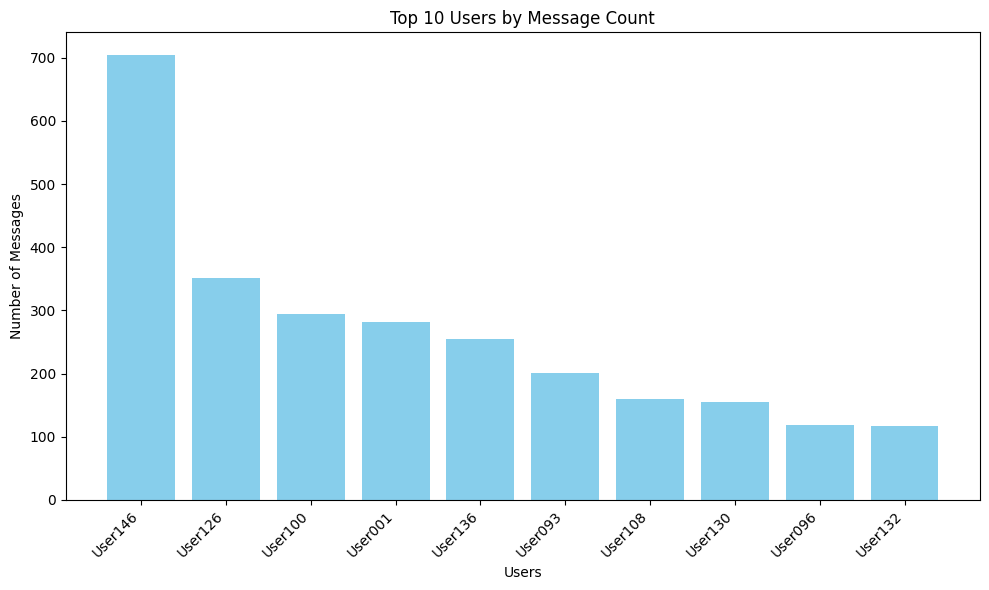

In [118]:
# Get the top 10 users
x = df['User'].value_counts().head(10)
user_names = x.index
msg_count = x.values

# Plotting the top 10 users
plt.figure(figsize=(10, 6))
plt.bar(user_names, msg_count, color='skyblue')
plt.xlabel('Users')
plt.ylabel('Number of Messages')
plt.title('Top 10 Users by Message Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Calculating User Contribution Percentage:**  

Determining the percentage contribution of each member to the total messages in the dataset.

*Libraries Used:*  
Pandas: Data manipulation and calculation, NumPy: Mathematical operations.

In [117]:
# Calculate the percentage contribution of each user
new_df = round(((df['User'].value_counts() / df.shape[0]) * 100), 2).reset_index().rename(
        columns={'index': 'name', 'user': 'percent'})

new_df.head(10)

,User,count
0,User146,12.77
1,User126,6.36
2,User100,5.34
3,User001,5.09
4,User136,4.62
5,User093,3.64
6,User108,2.90
7,User130,2.81
8,User096,2.14
9,User132,2.12


**Word Cloud Generation**   

Creating a word cloud visualization based on cleaned messages, depicting word frequency and prominence in the dataset.  "This visual shows big words for often-used words, giving an idea of what's talked about the most in the messages."

*Libraries Used:*
Pandas, NLTK, WordCloud, Matplotlib

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


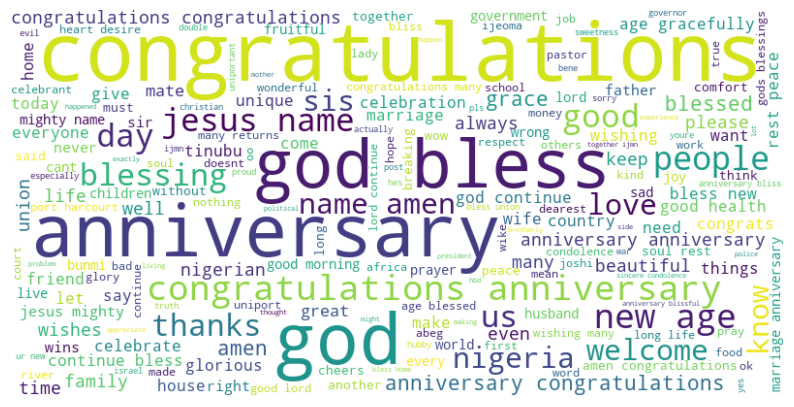

In [119]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re

# Download NLTK resources if not downloaded
nltk.download('stopwords')

# Load your Excel file into a DataFrame
file_path = 'masked_whatsapp_chat.xlsx'  # Replace with your file path
df = pd.read_excel(file_path)

# Remove group notifications and media omitted
df = df[~df['Message'].isin(['<Media omitted>', 'Group notification'])]

# Function to clean messages by removing stop words
def clean_text(message):
    stop_words = set(stopwords.words('english'))
    # Add stop words from 'stop_hinglish.txt'
    with open('stop_hinglish.txt', 'r') as file:
        stop_words_hinglish = file.read().splitlines()
    
    # Combine English and Hinglish stop words
    all_stop_words = stop_words.union(stop_words_hinglish)
    
    # Define additional phrases to remove
    phrases_to_remove = ['message deleted', 'brother','u', "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them","their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being","have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or",
    "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on","off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how","all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only","own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "look", "month", "system", "started", "matter", "sister", "issue", "project", "become", "point", "years", "ahead", "german", "p", "case", "yet", "million", "dey", "went", "best", "already", "guy", "month", "group", "mr", "public", "chief", "better", "stella", "dear", "person", "run", "na", "deleted", "prof", "message", "looking", "free", "leave", "stop", "left", "called", "ye", "collins", "part", "party", "going", "pay", "law", "year", "dr", "help", "wedding", "believe", "reason", "im", "set", "bro", "man", "place", "change", "remember", "men", "don't", "didnt", "show", "saw", "hand", "full", "girl", "boy", "tell", "got", "read", "use", "eye", "face", "asked", "woman", "old", "find", "fact", "really", "share", "happy", "three", "order", "way", "wish", "one", "guys", "meeting", "small", "enough", "increase", "ant", "remain", "coming", "go", "enjoy", "visit", "now", "avoid", "received", "still", "much", "may", "story", "thats", "price", "used", "stand", "u", "big", "state", "congratulation", "forget", "due", "took", "edited", "head", "win", "ij", "Ijeoma", "ify", "eat", "around", "ask", "someone", "video", "put", "two", "indeed", "car", "take", "thank", "back", "doc", "act", "something", "u91","ijn", "support", "lost", "thing", "birthday", "different", "oh", "less", "ijay", "nene", "see","fund",
    "dont"]

    # Remove punctuation and convert to lowercase
    cleaned_message = re.sub(r'[^\w\s]','', str(message)).lower()
    
    # Remove phrases and stop words, then tokenize
    tokens = cleaned_message.split()
    filtered_tokens = [word for word in tokens if word not in all_stop_words and word not in phrases_to_remove]
    return ' '.join(filtered_tokens)


# Apply the cleaning function to the 'Message' column
df['Cleaned_Message'] = df['Message'].apply(clean_text)

# Generate a word cloud from cleaned messages
text = ' '.join(df['Cleaned_Message'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


**Identifying Top 20 Most Common Words** 

Using the Counter from the collections module to count the frequency of tokenized words and retrieve the 20 most commonly occurring words.  "This output lists the top 20 words most frequently used in the messages. These words give a good idea of the main topics or subjects talked about the most in the conversations."

*Libraries Used:*  
Collections (Counting occurrences of words), Python Standard Library (Data manipulation)

In [ ]:
from collections import Counter

# Assuming 'all_words' contains your tokenized words
word_counter = Counter(all_words)

# Get the top 20 most common words
top_20_words = word_counter.most_common(20)
print(top_20_words)


[('happy', 1140), ('birthday', 742), ('congratulations', 460), ('anniversary', 421), ('may', 287), ('wedding', 264), ('god', 255), ('message', 190), ('dear', 181), ('good', 162), ('bless', 160), ('deleted', 158), ('amen', 158), ('years', 155), ('age', 140), ('new', 121), ('name', 113), ('jesus', 109), ('day', 107), ('many', 97)]


**Time-based Analysis**  

**Monthly Message Analysis**

Converting the 'DateTime' column to datetime format and conducting a group-based analysis to count messages per month.  "This output breaks down the messages by month and counts how many were sent in each month of the periods covered. It helps understand the activity or volume of messages over different months, giving an idea of when the conversation was more active or quieter."

Libraries Used:
Pandas: Data manipulation and datetime operations

In [ ]:
# Assuming the DataFrame is named 'whatsapp_df'
whatsapp_df['DateTime'] = pd.to_datetime(whatsapp_df['DateTime'], dayfirst=True)

# Now, let's proceed with monthly analysis
monthly_timeline = whatsapp_df.groupby([
    whatsapp_df['DateTime'].dt.year.rename('Year'),
    whatsapp_df['DateTime'].dt.month.rename('Month'),
    whatsapp_df['DateTime'].dt.strftime('%B').rename('Month Name')
]).size().reset_index(name='Message Count')

print(monthly_timeline)

   Year  Month Month Name  Message Count
0  2023      4      April            407
1  2023      5        May           1057
2  2023      6       June            976
3  2023      9  September            262
4  2023     10    October           1371
5  2023     11   November           1044
6  2023     12   December            404


**Daily Message Timeline Visualization**
 
Plotting a line graph to display the daily message count over time.  "The graph shows how many messages were sent each day over time. Peaks or higher points indicate days with more messages, while valleys or lower points mean fewer messages. It helps see busy or quiet periods in the conversation's activity."

Libraries Used: Pandas, Matplotlib

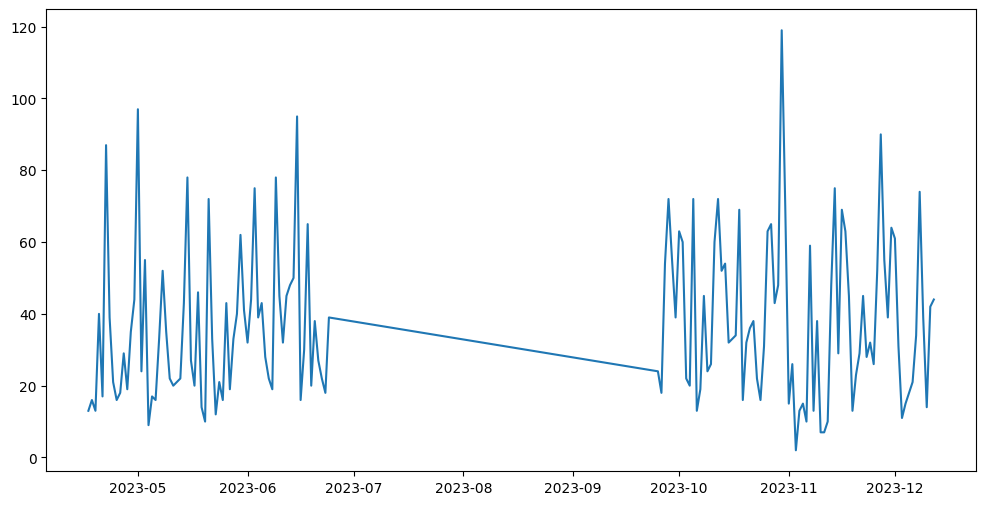

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'whatsapp_df' is your DataFrame and 'DateTime' column exists
whatsapp_df['only_date'] = whatsapp_df['DateTime'].dt.date

daily_timeline = whatsapp_df.groupby('only_date').count()['Message'].reset_index()

plt.figure(figsize=(12, 6))
plt.plot(daily_timeline['only_date'], daily_timeline['Message'])
plt.show()

**Busiest Days Analysis:**  

Creating a bar chart to display the frequency of messages sent on each day of the week. 
Certainly! Looking at the chart showcasing the frequency of messages sent on different days:    

"From this chart, we observe that [mention the day] stands out as the most active day, with a notably higher number of messages sent compared to other days. On the other hand, [mention the day] appears to be the quietest day, with a significantly lower message count. This information provides insights into the conversation's dynamics, highlighting the days when interactions were most active and when they were relatively calmer."

*Libraries Used:* Pandas, Matplotlib

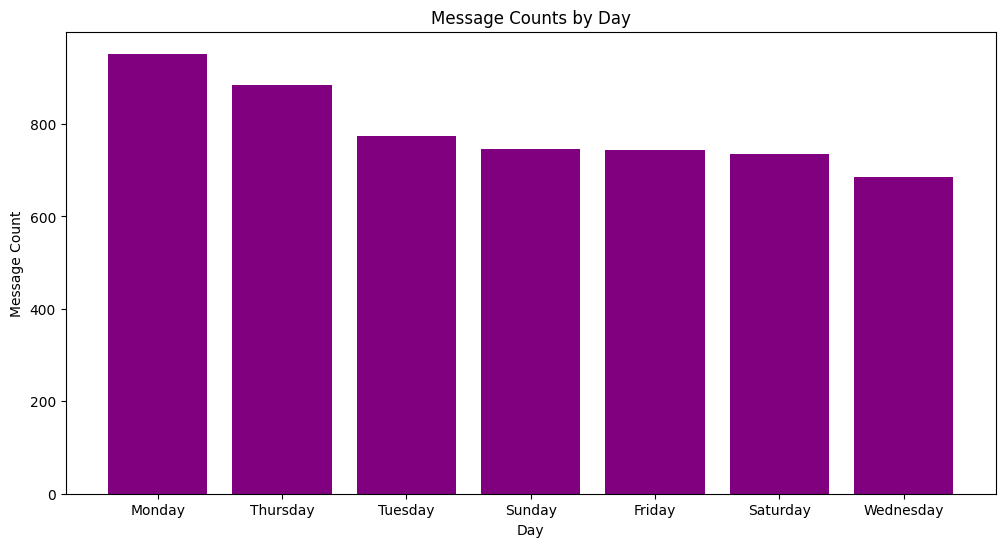

In [124]:
import matplotlib.pyplot as plt

# Checking if 'Date' column exists, assuming it contains date information
if 'Date' in whatsapp_df.columns:
    # Convert 'Date' column to datetime to derive day names
    whatsapp_df['day_name'] = pd.to_datetime(whatsapp_df['Date'], format='%d-%m-%Y').dt.day_name()
    
    # Count occurrences of each day
    busy_day = whatsapp_df['day_name'].value_counts()

    # Plotting the bar chart
    plt.figure(figsize=(12, 6))
    plt.bar(busy_day.index, busy_day.values, color='purple')
    plt.xlabel('Day')
    plt.ylabel('Message Count')
    plt.title('Message Counts by Day')
    plt.show()
else:
    print("The 'Date' column does not exist in the DataFrame.")


**Monthly Activity Map**  

Message Count Comparison by Month: Creating visualizations (bar and line charts) to compare message counts across different months. Both charts Bar Chart (Left) and Line Chart (Right), help understand the variations in message volume across different months, indicating which months had higher or lower message activity in the conversation.

Libraries Used: Matplotlib

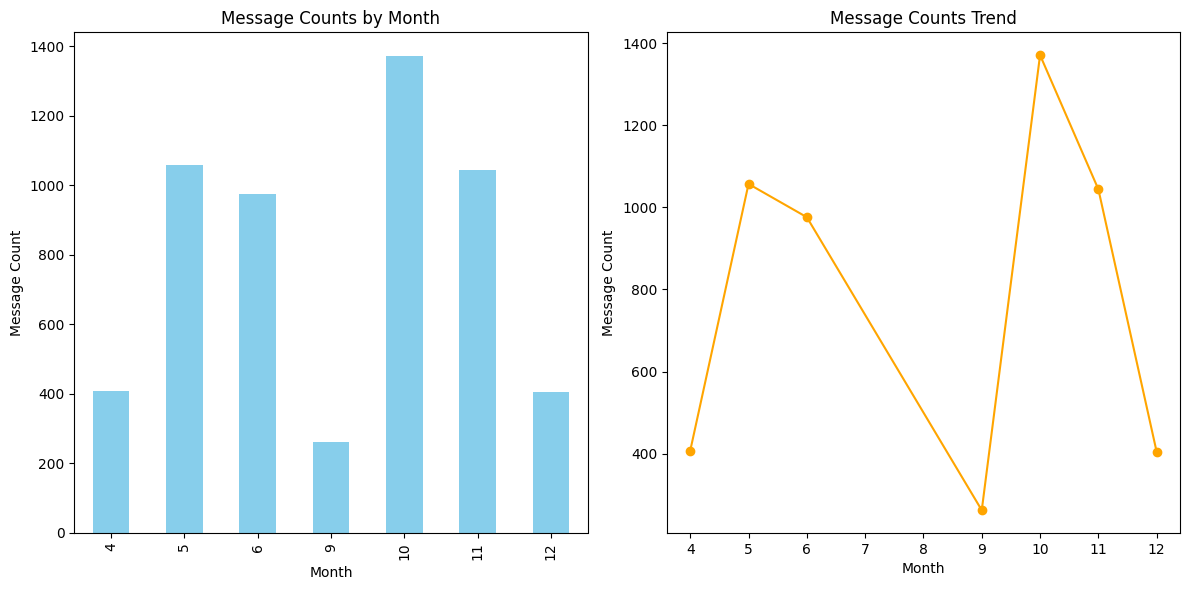

In [123]:
# Assuming 'Date' column exists in 'whatsapp_df'
# Extract month from the 'Date' column
whatsapp_df['Month'] = pd.to_datetime(whatsapp_df['Date'], format='%d-%m-%Y').dt.month

# Count messages per month
busy_month = whatsapp_df['Month'].value_counts().sort_index()

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Bar chart
plt.subplot(1, 2, 1)
busy_month.plot(kind='bar', color='skyblue')
plt.title('Message Counts by Month')
plt.xlabel('Month')
plt.ylabel('Message Count')

# Line chart
plt.subplot(1, 2, 2)
busy_month.plot(kind='line', marker='o', color='orange')
plt.title('Message Counts Trend')
plt.xlabel('Month')
plt.ylabel('Message Count')

plt.tight_layout()
plt.show()


**User Activity Heatmap** 

Utilizing a heatmap, we tracked user activity throughout the week, showcasing engagement patterns across a 24-hour cycle. This visual highlights active (Yellow) and inactive (Black) periods, aiding businesses in optimizing ad placement by predicting peak engagement times. Interestingly, Saturdays at 7 PM emerged as the peak activity slot, ideal for maximizing ad impact. Conversely, Wednesday at 12 Midnight showed no activity, potentially due to midweek stress limiting communication.  

Libraries Used: Pandas, Matplotlib


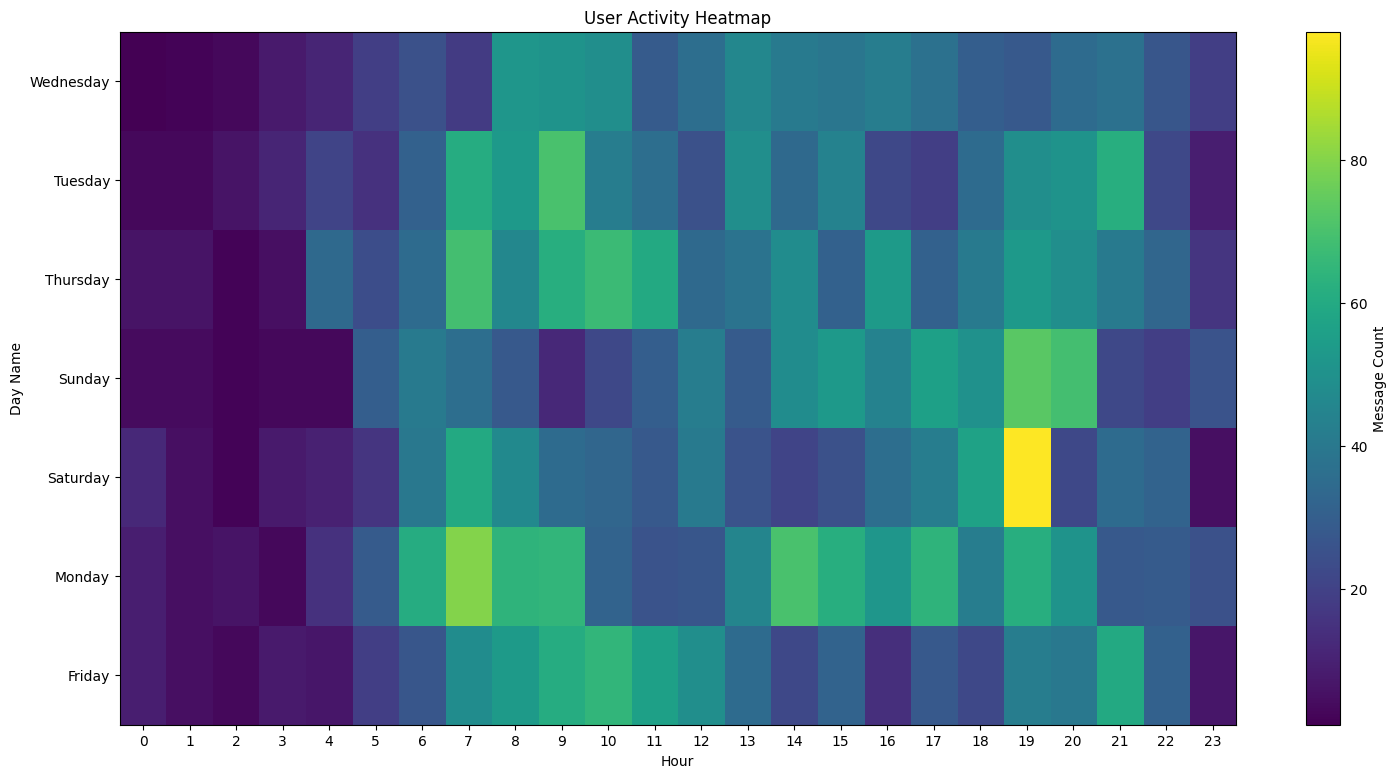

In [162]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'whatsapp_df' is your DataFrame
# Convert Date and Time columns to datetime

whatsapp_df['Datetime'] = pd.to_datetime(whatsapp_df['Date'] + ' ' + whatsapp_df['Time'], format='%d-%m-%Y %I:%M %p')

# Extract day name and hour
whatsapp_df['Day Name'] = whatsapp_df['Datetime'].dt.day_name()
whatsapp_df['Hour'] = whatsapp_df['Datetime'].dt.hour

# Create a pivot table for the heatmap
heatmap_data = whatsapp_df.pivot_table(index='Day Name', columns='Hour', aggfunc='size', fill_value=0)

# Plotting the heatmap
plt.figure(figsize=(18, 9))
plt.imshow(heatmap_data, cmap='viridis', aspect='auto')

# Adding labels and color bar
plt.title('User Activity Heatmap')
plt.xlabel('Hour')
plt.ylabel('Day Name')
plt.colorbar(label='Message Count')

# Setting ticks
plt.xticks(range(len(heatmap_data.columns)), heatmap_data.columns)
plt.yticks(range(len(heatmap_data.index)), heatmap_data.index)
plt.gca().invert_yaxis()  # Invert y-axis to display days from Monday to Sunday top-down

plt.show()


**User Activity by Hour:** 

Extracting the hour from the 'DateTime' column to count the number of messages per hour and plotting a bar chart to visualize user activity distribution across different hours of the day.

*Libraries Used:*
Matplotlib

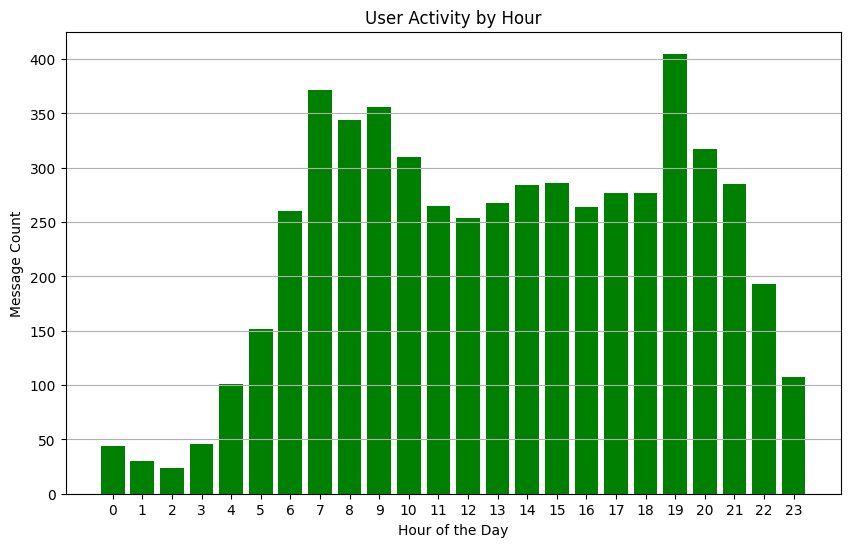

Top 5 Busiest Hours:
Hour 19:00 - 20:00 - Messages: 405
Hour 7:00 - 8:00 - Messages: 372
Hour 9:00 - 10:00 - Messages: 356
Hour 8:00 - 9:00 - Messages: 344
Hour 20:00 - 21:00 - Messages: 317


In [167]:
import matplotlib.pyplot as plt

# Checking if 'DateTime' column exists
if 'DateTime' in whatsapp_df.columns:
    # Extracting the hour from the 'DateTime' column
    whatsapp_df['hour'] = pd.to_datetime(whatsapp_df['DateTime']).dt.hour
    
    # Counting the number of messages per hour
    active_hours = whatsapp_df['hour'].value_counts().sort_index()

    # Plotting the active hours
    plt.figure(figsize=(10, 6))
    plt.bar(active_hours.index, active_hours.values, color='green')
    plt.title("User Activity by Hour")
    plt.xlabel("Hour of the Day")
    plt.ylabel("Message Count")
    plt.xticks(range(24))  # Show all 24 hours on the x-axis
    plt.grid(axis='y')  # Add gridlines for better readability
    plt.show()

    # Displaying top 5 busiest hours
    top_5_busiest_hours = active_hours.nlargest(5)
    print("Top 5 Busiest Hours:")
    for hour in top_5_busiest_hours.index:
        count = top_5_busiest_hours[hour]
        print(f"Hour {hour}:00 - {hour + 1}:00 - Messages: {count}")
else:
    print("The 'DateTime' column does not exist in the DataFrame.")


**WhatsApp Chat Sentiment Analysis:**   

Using the NLTK library's VADER sentiment analysis tool to assess the sentiment of messages in a WhatsApp chat. The code then visualizes the sentiment trends over time.   
Key Peaks or Dips: Look for sharp spikes or drops, as they may signify particularly positive or negative phases within the conversation.

*Libraries Used:*
Pandas, NLTK (VADER), Matplotlib

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


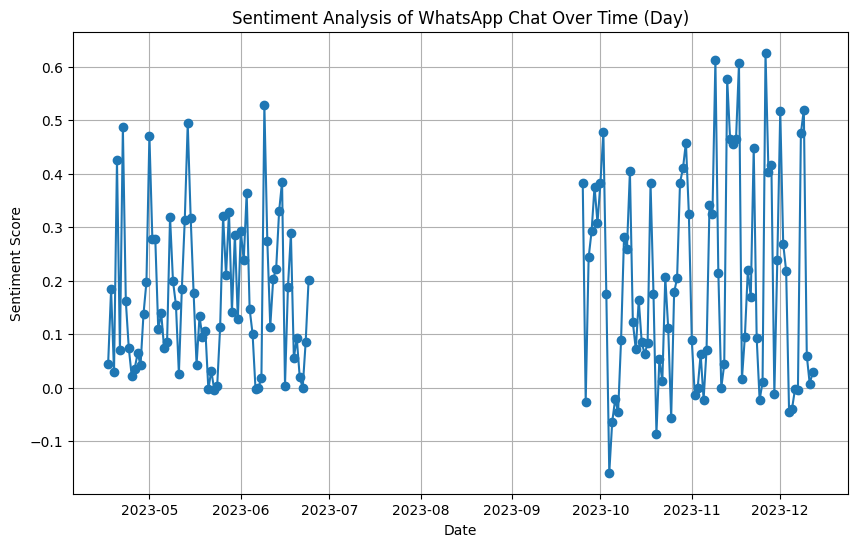

In [130]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (if you haven't done this before)
nltk.download('vader_lexicon')

# Load the WhatsApp chat data from Excel into a DataFrame
whatsapp_df = pd.read_excel('masked_whatsapp_chat.xlsx')

# Assuming 'Date' is the column name for timestamps and 'Message' for chat messages
sid = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores and timestamps
sentiment_scores = []
timestamps = []

# Iterate through each message to analyze sentiment
for index, row in whatsapp_df.iterrows():
    timestamp = row['Date']  # Assuming 'Date' is the column name for timestamps
    message = row['Message']  # Assuming 'Message' is the column name for chat messages
    
    # Check if 'Message' is a string, if not, skip this row
    if isinstance(message, str):
        # Perform sentiment analysis on each message
        sentiment_score = sid.polarity_scores(message)
        
        # Append sentiment score and timestamp to lists
        sentiment_scores.append(sentiment_score['compound'])  # Using compound score for overall sentiment
        timestamps.append(timestamp)

# Convert timestamps to pandas datetime for better plotting
timestamps = pd.to_datetime(timestamps, format='%d-%m-%Y')

# Create a DataFrame for sentiment analysis results
sentiment_df = pd.DataFrame({'Timestamp': timestamps, 'Sentiment Score': sentiment_scores})
sentiment_df.set_index('Timestamp', inplace=True)

# Resample the data if needed (e.g., by day, hour) to see sentiment trends
# Example: resample by day
sentiment_df_resampled = sentiment_df.resample('D').mean()

# Plotting the sentiment over time
plt.figure(figsize=(10, 6))
plt.plot(sentiment_df_resampled.index, sentiment_df_resampled['Sentiment Score'], marker='o')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of WhatsApp Chat Over Time (Day)')
plt.grid(True)
plt.show()


**Sentiment Analysis Plot Over Time**    
Conducting sentiment analysis on WhatsApp chat data using NLTK's VADER sentiment analyzer. It generates a plot showcasing the sentiment score fluctuations over time.

**Top Sentiments Distribution**   
Analyzing sentiment polarity counts within the chat data and displaying the distribution of top sentiments (positive, negative, neutral) through a pie chart.

*Libraries Used:* Pandas, NLTK, and Matplotlib for plotting.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


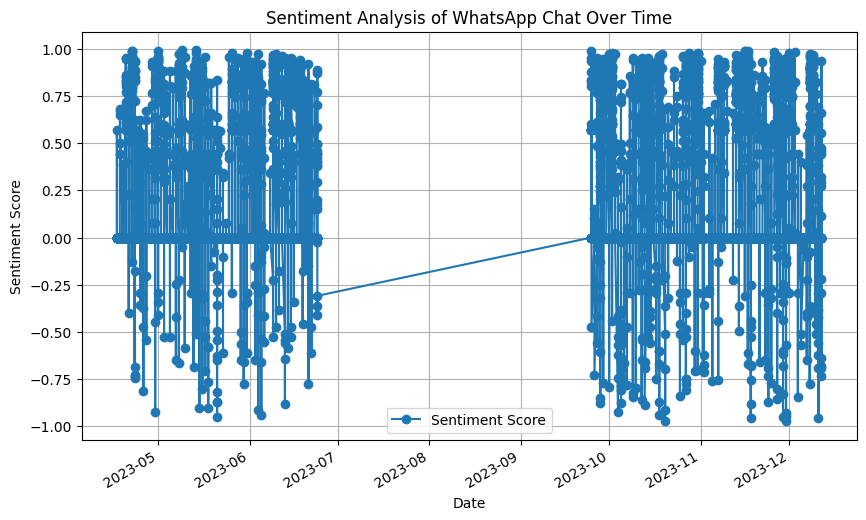

Top 30 Sentiments:
Neutral: 2957
Positive: 2233
Negative: 315


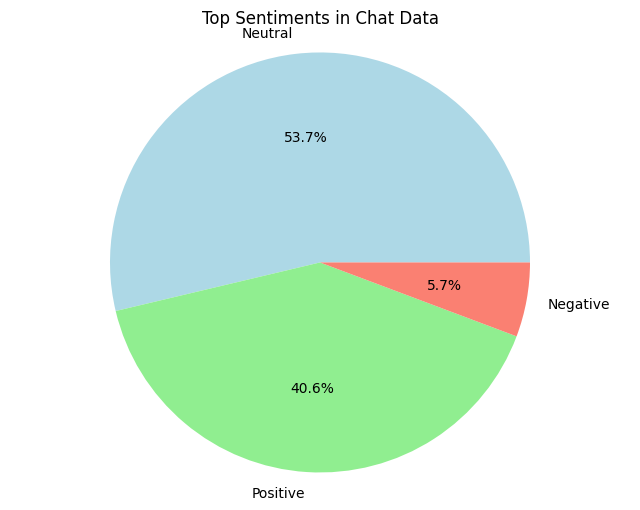

In [23]:
import pandas as pd
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import nltk

# Download NLTK data (if you haven't done this before)
nltk.download('vader_lexicon')

# Load the WhatsApp chat data from Excel into a DataFrame
whatsapp_df = pd.read_excel('masked_whatsapp_chat.xlsx')

# Assuming 'Date' is the column name for timestamps and 'Message' for chat messages
sid = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores and timestamps
sentiment_scores = []
timestamps = []

# Iterate through each message to analyze sentiment
for index, row in whatsapp_df.iterrows():
    timestamp = row['Date']  # Assuming 'Date' is the column name for timestamps
    message = row['Message']  # Assuming 'Message' is the column name for chat messages
    
    # Check if 'Message' is a string, if not, skip this row
    if isinstance(message, str):
        # Perform sentiment analysis on each message
        sentiment_score = sid.polarity_scores(message)
        
        # Append sentiment score and timestamp to lists
        sentiment_scores.append(sentiment_score['compound'])  # Using compound score for overall sentiment
        timestamps.append(timestamp)

# Convert timestamps to pandas datetime for better plotting
timestamps = pd.to_datetime(timestamps, format='%d-%m-%Y')

# Create a DataFrame for sentiment analysis results
sentiment_df = pd.DataFrame({'Timestamp': timestamps, 'Sentiment Score': sentiment_scores})
sentiment_df.set_index('Timestamp', inplace=True)

# Plotting the sentiment over time
sentiment_df.plot(figsize=(10, 6), marker='o')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Analysis of WhatsApp Chat Over Time')
plt.grid(True)
plt.show()


# Load the WhatsApp chat data from Excel into a DataFrame
whatsapp_df = pd.read_excel('masked_whatsapp_chat.xlsx')

# Assuming 'Date' is the column name for timestamps and 'Message' for chat messages
sid = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores and timestamps
sentiment_scores = []

# Iterate through each message to analyze sentiment
for index, row in whatsapp_df.iterrows():
    message = row['Message']  # Assuming 'Message' is the column name for chat messages
    
    # Check if 'Message' is a string, if not, skip this row
    if isinstance(message, str):
        # Perform sentiment analysis on each message
        sentiment_score = sid.polarity_scores(message)
        
        # Append sentiment score to list
        sentiment_scores.append(sentiment_score['compound'])  # Using compound score for overall sentiment

# Count the number of sentiments falling into each category
positive_count = sum(score > 0 for score in sentiment_scores)
negative_count = sum(score < 0 for score in sentiment_scores)
neutral_count = sum(score == 0 for score in sentiment_scores)


# Display the top counts
print("Top 30 Sentiments:")
print(f"Neutral: {neutral_count}")
print(f"Positive: {positive_count}")
print(f"Negative: {negative_count}")

import matplotlib.pyplot as plt

# Top 30 sentiments
top_sentiments = ['Neutral', 'Positive', 'Negative']
sentiment_counts = [2957, 2233, 315]  # Update these counts with your actual counts

# Plotting top sentiments as a pie chart
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts, labels=top_sentiments, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'])
plt.title('Top Sentiments in Chat Data')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


**Sentiment analysis (seperated)  over time (Weekly)**  

*Libraries Used:* Pandas, NTLK, Matplotlib

The chart portrays sentiment percentages in WhatsApp group chats from April 18 to December 26, 2023. Positive sentiment dominates, reaching notable peaks of 72.8% on May 9, 2023, and a low of 20.6% on June 27, 2023. Neutral sentiment remains consistent at 55-65%, with sporadic spikes in negative sentiment, particularly on May 23 and October 31, 2023.

Understanding these sentiment patterns is crucial. Fluctuations indicate specific impactful events, while stable neutral sentiments depict consistent engagement. Spikes in negativity point to moments of potential concern or contention. This comprehension aids in grasping group dynamics and identifying crucial moments for engagement or intervention.

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\XtraWorX\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite 

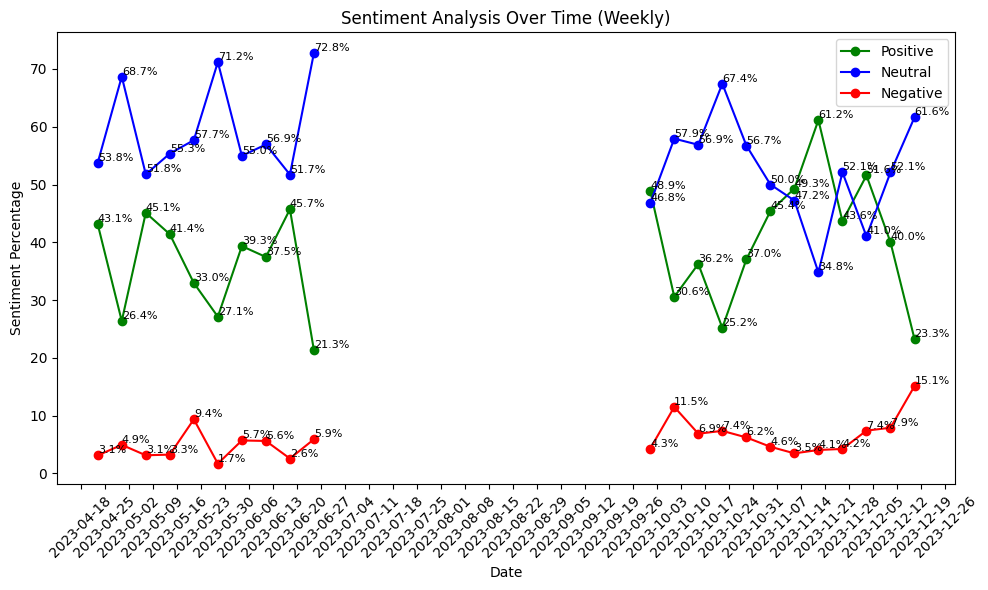

In [169]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Download NLTK data (if you haven't done this before)
nltk.download('vader_lexicon')

# Convert non-string data in 'Message' column to empty strings
whatsapp_df['Message'] = whatsapp_df['Message'].apply(lambda x: '' if isinstance(x, float) else x)

# Now, perform sentiment analysis using NLTK's Vader SentimentIntensityAnalyzer

# Assuming your CSV has a column named 'date' and 'user_message' containing the chat data
# Replace these column names with the ones in your CSV if they're different

# Perform sentiment analysis using NLTK's Vader SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()

# Create empty lists to store sentiment scores and timestamps
sentiment_scores = []
timestamps = []

# Create a DataFrame to store sentiment counts
sentiment_counts = {
    'positive': [],
    'neutral': [],
    'negative': []
}

# Iterate through each message to analyze sentiment and populate counts
for index, row in whatsapp_df.iterrows():
    timestamp = row['Date']  # Ensure 'Date' matches the actual column name
    message = row['Message']  # Change 'user_message' to 'Message' or the correct column name
    
    # Check for NaN values or convert non-string data to an empty string
    if isinstance(message, float):
        message = str(message)  # Convert float values to string
    elif pd.isnull(message):
        message = ''  # Replace NaN values with an empty string
    
    # Perform sentiment analysis on each message

    sentiment_score = sid.polarity_scores(message)
    
    # Append sentiment score and timestamp to lists
    sentiment_scores.append(sentiment_score['compound'])  # Using compound score for overall sentiment
    timestamps.append(timestamp)
    
    # Categorize sentiments based on compound score and populate counts
    if sentiment_score['compound'] >= 0.05:
        sentiment_counts['positive'].append(1)
        sentiment_counts['neutral'].append(0)
        sentiment_counts['negative'].append(0)
    elif sentiment_score['compound'] <= -0.05:
        sentiment_counts['positive'].append(0)
        sentiment_counts['neutral'].append(0)
        sentiment_counts['negative'].append(1)
    else:
        sentiment_counts['positive'].append(0)
        sentiment_counts['neutral'].append(1)
        sentiment_counts['negative'].append(0)

# Convert timestamps to pandas datetime for better plotting
timestamps = pd.to_datetime(timestamps, dayfirst=True)

# Create a DataFrame for sentiment scores and counts
sentiment_df = pd.DataFrame({'Timestamp': timestamps, 'Sentiment Score': sentiment_scores})
sentiment_df.set_index('Timestamp', inplace=True)

# Add sentiment counts to the DataFrame
sentiment_df['Positive'] = sentiment_counts['positive']
sentiment_df['Neutral'] = sentiment_counts['neutral']
sentiment_df['Negative'] = sentiment_counts['negative']

# Resample the data to weekly frequency and calculate sentiment percentages
sentiment_df_weekly = sentiment_df.resample('W').mean()
sentiment_counts_weekly = sentiment_df[['Positive', 'Neutral', 'Negative']].resample('W').sum()

# Calculate sentiment percentages
total_sentiments = sentiment_counts_weekly.sum(axis=1)
sentiment_percentages = sentiment_counts_weekly.divide(total_sentiments, axis=0) * 100

# Plotting the sentiment percentages over time using line chart
plt.figure(figsize=(10, 6))

# Plotting sentiment percentages for positive, neutral, and negative sentiments
plt.plot(sentiment_percentages.index, sentiment_percentages['Positive'], marker='o', color='green', label='Positive')
plt.plot(sentiment_percentages.index, sentiment_percentages['Neutral'], marker='o', color='blue', label='Neutral')
plt.plot(sentiment_percentages.index, sentiment_percentages['Negative'], marker='o', color='red', label='Negative')

plt.xlabel('Date')
plt.ylabel('Sentiment Percentage')
plt.title('Sentiment Analysis Over Time (Weekly)')
plt.legend()

# Show percentages as labels on the plot
for i, date in enumerate(sentiment_percentages.index):
    plt.text(date, sentiment_percentages.iloc[i]['Positive'], f"{sentiment_percentages.iloc[i]['Positive']:.1f}%", ha='left', va='bottom', fontsize=8)
    plt.text(date, sentiment_percentages.iloc[i]['Neutral'], f"{sentiment_percentages.iloc[i]['Neutral']:.1f}%", ha='left', va='bottom', fontsize=8)
    plt.text(date, sentiment_percentages.iloc[i]['Negative'], f"{sentiment_percentages.iloc[i]['Negative']:.1f}%", ha='left', va='bottom', fontsize=8)

# Formatting x-axis to show weekly intervals
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Sentiment Categorization & Visualization**  

Libraries Used: Matplotlib

, 'Joyous' was the most frequently detected sentiment with 46 occurrences, indicating a prevalent positive or cheerful tone within the conversation.

{'abusive': 6, 'sad': 1, 'uncertain': 0, 'exciting': 4, 'joyous': 46, 'hopeful': 1}


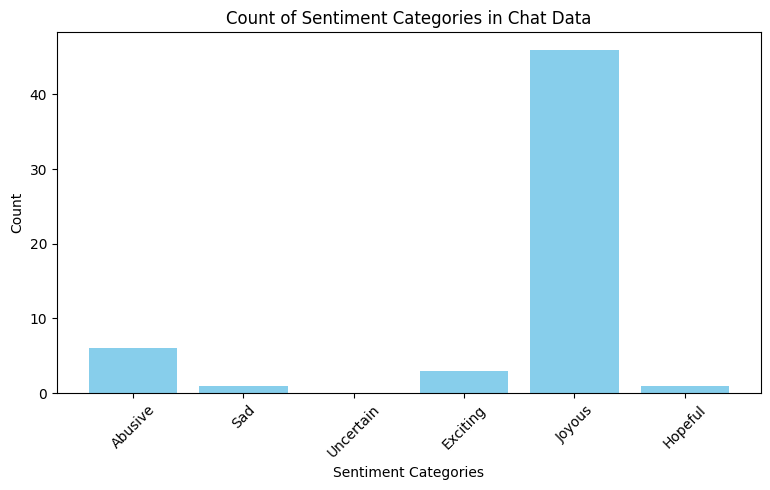

In [168]:
sentiment_lexicon = {
    'abusive': ['offensive', 'hate', 'obscene', 'threatening', 'profanity'],
    'sad': ['unhappy', 'depressed', 'heartbroken', 'miserable', 'upset'],
    'uncertain': ['doubtful', 'indecisive', 'ambiguous', 'puzzled', 'ambiguous'],
    'exciting': ['thrilling', 'electric', 'stimulating', 'exhilarating', 'rousing'],
    'joyous': ['elated', 'ecstatic', 'blissful', 'cheerful', 'radiant'],
    'hopeful': ['optimistic', 'encouraged', 'uplifting', 'expectant', 'confident'],
    # Other categories remain unchanged
}

# Update Categorization Function

def categorize_sentiment(word):
    lower_word = word.lower()
    for sentiment, words in sentiment_lexicon.items():
        for w in words:
            if w in lower_word:
                return sentiment
    return None   # Return None if the word doesn't belong to any category


#Check Categorization and Counting
# Assuming 'whatsapp_data' contains your chat data in a DataFrame

# Assuming 'whatsapp_data' contains your chat data in a DataFrame

# Check Categorization and Counting
# Check Categorization and Counting

all_words = [word for message_words in whatsapp_df['Message'] if isinstance(message_words, str) for word in message_words.split()]

category_counts = {
    'abusive': 0,
    'sad': 0,
    'uncertain': 0,
    'exciting': 0,
    'joyous': 0,
    'hopeful': 0
}

for word in all_words:
    category = categorize_sentiment(word)
    if category:
        category_counts[category] += 1

print(category_counts)


import matplotlib.pyplot as plt

# Counts for specific sentiment categories
sentiment_categories = ['Abusive', 'Sad', 'Uncertain', 'Exciting', 'Joyous', 'Hopeful']
category_counts = [6, 1, 0, 3, 46, 1]  # Update these counts with your actual counts

# Top 30 sentiments
top_sentiments = ['Neutral', 'Positive', 'Negative']
sentiment_counts = [2957, 2233, 315]  # Update these counts with your actual counts


# Plotting sentiment categories
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.bar(sentiment_categories, category_counts, color='skyblue')
plt.xlabel('Sentiment Categories')
plt.ylabel('Count')
plt.title('Count of Sentiment Categories in Chat Data')
plt.xticks(rotation=45)
plt.tight_layout()

# Plotting top sentiments
# plt.subplot(1, 2, 2)
# plt.bar(top_sentiments, sentiment_counts, color='lightgreen')
# plt.xlabel('Top Sentiments')
# plt.ylabel('Count')
# plt.title('Top Sentiments in Chat Data')
# plt.tight_layout()

plt.show()


In [20]:
import pandas as pd
from nltk.tokenize import word_tokenize
from collections import Counter
import matplotlib.pyplot as plt

**Word Frequency Analysis and Visualization**  

Tokenizing the messages, counting word frequency, and generating a bar chart displaying the top 20 most frequent words

*Libraries Used:* NLTK, Matplotlib

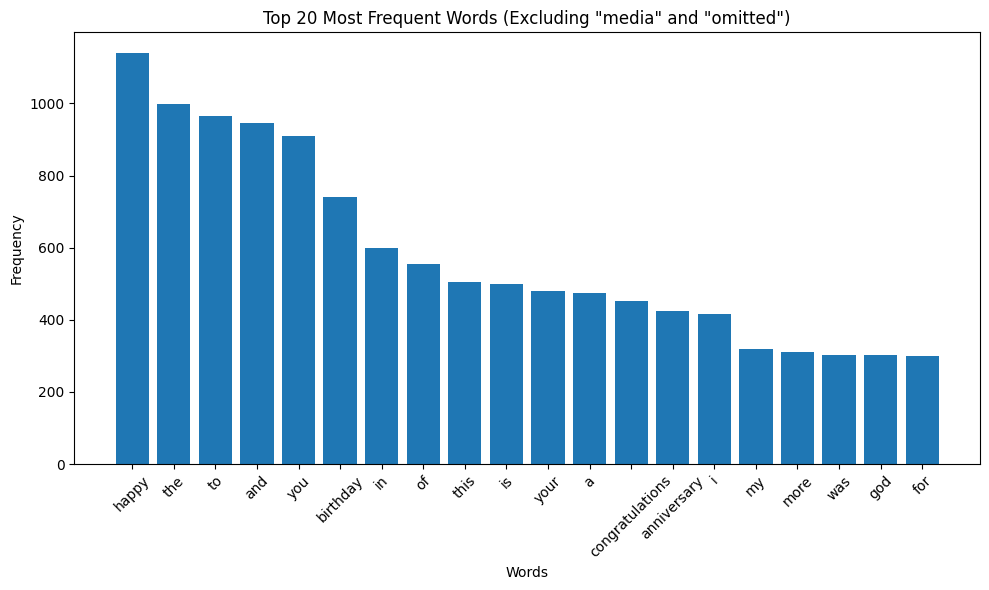

In [21]:

# Assuming 'whatsapp_df' is your DataFrame with the 'Message' column
messages = whatsapp_df['Message'].str.cat(sep=' ')

# Tokenize the text into words
tokens = word_tokenize(messages)

# Convert tokens to lowercase and filter out non-alphabetic words, 'media', and 'omitted'
words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in ['media', 'omitted']]

# Calculate word frequency
word_freq = Counter(words)

# Top N words or phrases
top_n = 20
top_words = dict(word_freq.most_common(top_n))

# Plot word frequency
plt.figure(figsize=(10, 6))
plt.bar(top_words.keys(), top_words.values())
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title(f'Top {top_n} Most Frequent Words (Excluding "media" and "omitted")')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
